In [1]:
# utility
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

dataset = arff.loadarff('./data/ames_housing.arff')
data = pd.DataFrame(dataset[0])

print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

Number of rows in the data: 2930
Number of columns in the data: 81


## First data engineering
We drop Pool_Qc feature, beacuse is information is already described by the feature Pool_Area

In [2]:
data = data.drop(labels='Pool_QC', axis=1)

## Make data split


In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Sale_Price'])
Y = data['Sale_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20)

1588    209200.0
1282    136870.0
1970    169500.0
2695     91000.0
1063    615000.0
Name: Sale_Price, dtype: float64

## One hot encoding
We are going to OneHotEncode the discrete variable

In [4]:
from sklearn.preprocessing import OneHotEncoder

#feature trasformate in livello

#tenere solo le feature numeriche


new_X_train = X_train._get_numeric_data()
new_X_test = X_test._get_numeric_data()

#TODO: controllare 'fair', 'Typical'
def refineData(df):
    replace = {
        "Kitchen_Qual": {b'Poor': 0, b'Fair': 1, b'Typical': 2, b'Good': 3, b'Excellent': 4},
        "Utilities": {b'AllPub': 1, b'NoSewr': 2, b'NoSeWa': 3},
        "Land_Slope": {b'Gtl': 1, b'Mod': 2, b'Sev': 3},
        "Overall_Qual":{b'Very_Poor': 1, b'Poor': 2, b'Below_Average': 3, b'Average': 4, b'Above_Average': 5, b'Fair': 6, b'Good': 7, b'Very_Good': 8, b'Excellent': 9, b'Very_Excellent': 10},
        "Overall_Cond":{b'Very_Poor': 1, b'Poor': 2, b'Below_Average': 3, b'Average': 4, b'Above_Average': 5, b'Fair': 6, b'Good': 7, b'Very_Good': 8, b'Excellent': 9, b'Very_Excellent': 10},
        "Exter_Qual":{b'Fair': 1, b'Typical': 2, b'Good': 3, b'Excellent': 4},
        "Exter_Cond":{b'Fair': 1, b'Typical': 2, b'Good': 3, b'Excellent': 4},
    }
    data = df.replace(replace)
    return data

data = refineData(data)

categorical_idx = ['MS_SubClass','MS_Zoning','Street','Alley','Lot_Shape','Land_Contour','Lot_Config','Land_Slope','Neighborhood','Condition_1','Condition_2','Bldg_Type','House_Style','Roof_Style','Roof_Matl','Exterior_1st','Exterior_2nd','Mas_Vnr_Type','Foundation','Bsmt_Qual','Bsmt_Cond','Bsmt_Exposure','BsmtFin_Type_1','BsmtFin_Type_2','Heating','Heating_QC','Central_Air','Electrical','Functional','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Paved_Drive','Fence','Misc_Feature','Sale_Type','Sale_Condition']

oh = OneHotEncoder(sparse=False, handle_unknown='ignore', min_frequency=0.15, max_categories=5)
oh.fit(X_train[categorical_idx])

X_train_e = oh.transform(X_train[categorical_idx])
X_test_e = oh.transform(X_test[categorical_idx])

for i,col in enumerate(oh.get_feature_names_out()):
    new_X_train[col] = X_train_e[:,i]

for i,col in enumerate(oh.get_feature_names_out()):
    new_X_test[col] = X_test_e[:,i]

#TODO we can try to defragment dataframe

new_X_train.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Paved_Drive_b'Paved',Paved_Drive_infrequent_sklearn,Fence_b'No_Fence',Fence_infrequent_sklearn,Misc_Feature_b'None',Misc_Feature_infrequent_sklearn,Sale_Type_b'WD ',Sale_Type_infrequent_sklearn,Sale_Condition_b'Normal',Sale_Condition_infrequent_sklearn
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,...,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,57.909983,10137.997440,1971.335751,1984.308447,101.417662,4.200939,48.263225,560.567833,1045.692406,1157.219283,...,0.906997,0.093003,0.805461,0.194539,0.964164,0.035836,0.864761,0.135239,0.822952,0.177048
std,33.252587,8277.147804,30.271067,20.836579,176.446941,2.240202,167.114972,442.837291,431.826251,388.025018,...,0.290499,0.290499,0.395930,0.395930,0.185921,0.185921,0.342052,0.342052,0.381791,0.381791
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,7397.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,217.750000,784.000000,876.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,63.000000,9466.000000,1973.000000,1993.000000,0.000000,3.000000,0.000000,461.000000,984.000000,1085.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,11617.500000,2001.000000,2004.000000,163.000000,7.000000,0.000000,806.500000,1292.750000,1382.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,5095.000000,5095.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


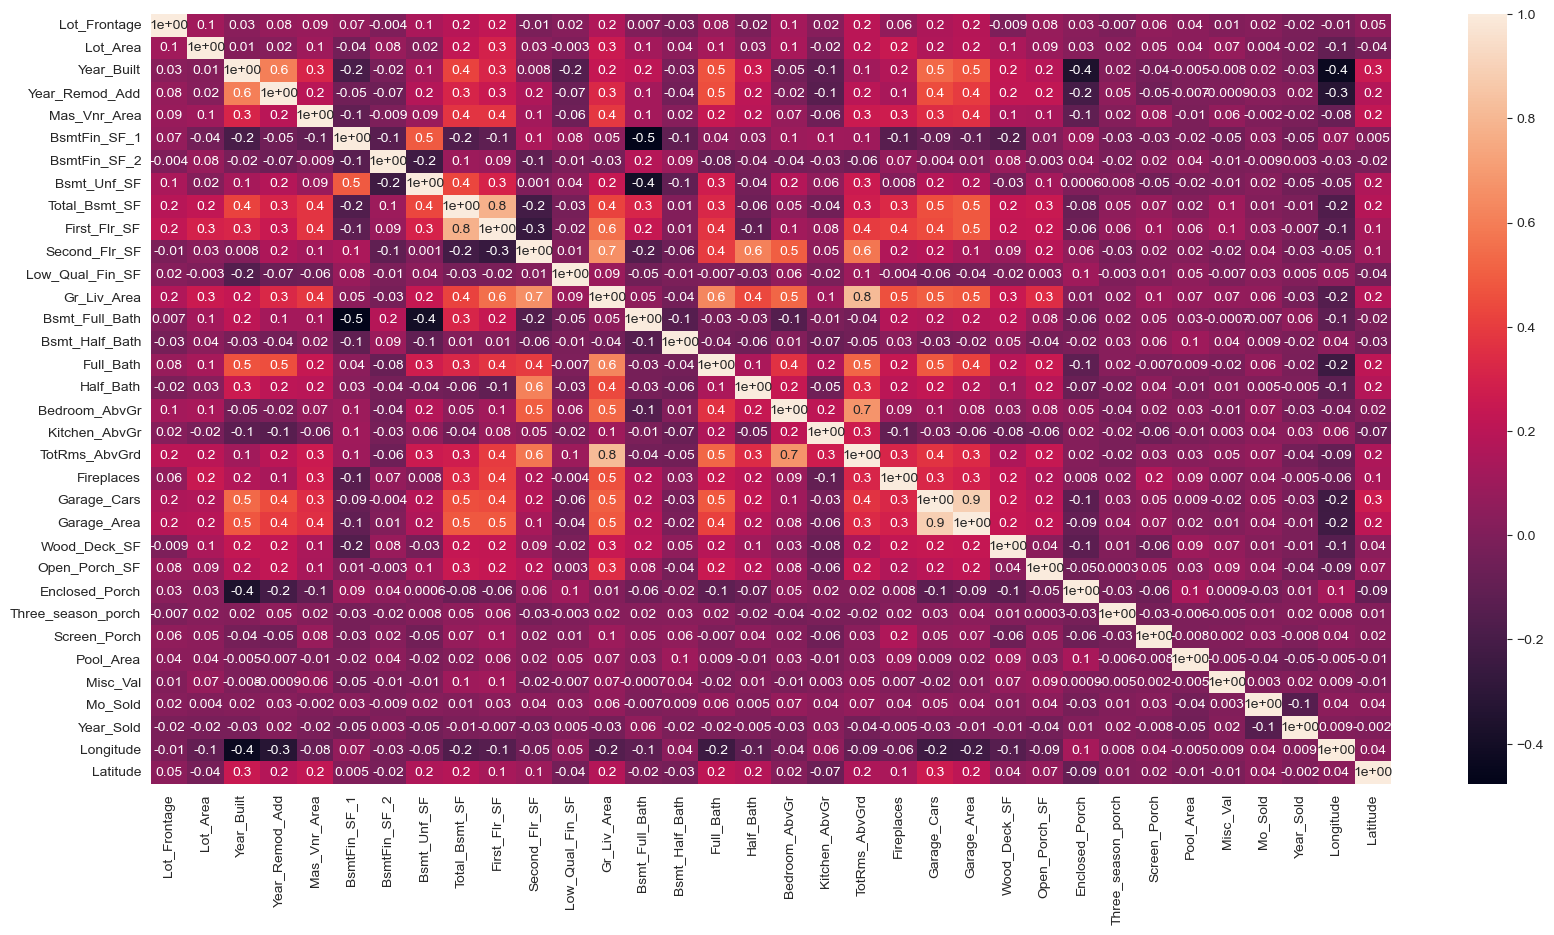

In [5]:
#figure size
plt.figure(figsize=(20, 10))
#heat map for correlation coefficient
sns.heatmap(X_train.corr(), annot=True, fmt="0.1")
plt.show()

# Plot some plot for correlatted features

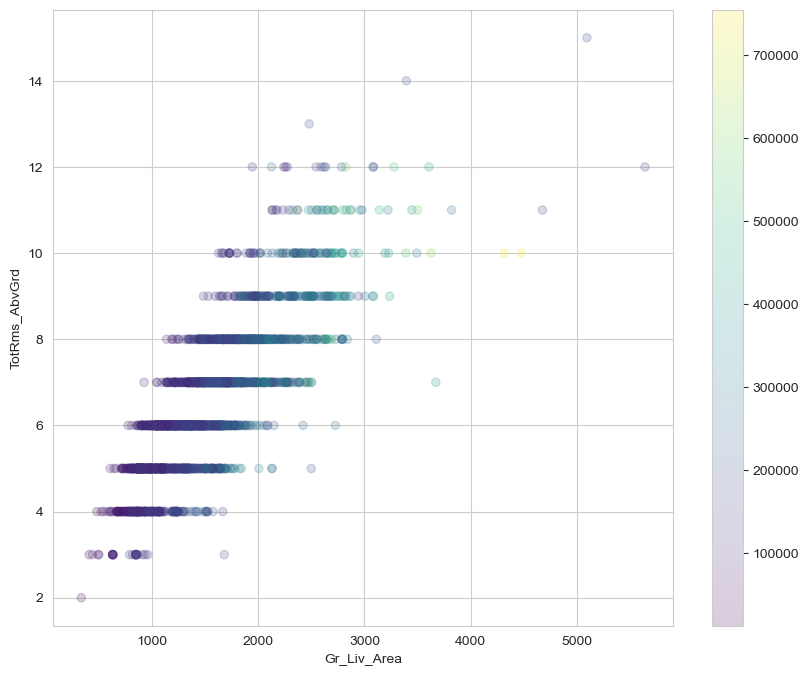

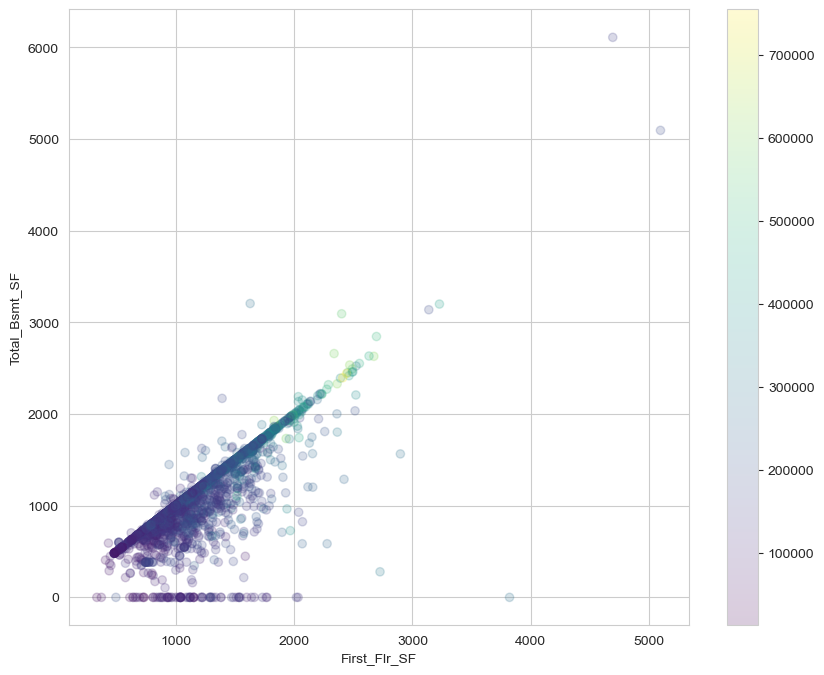

In [6]:
fig, axs = plt.subplots(figsize=(10, 8))

pos = plt.scatter(data.Gr_Liv_Area, data.TotRms_AbvGrd, c = data.Sale_Price, cmap="viridis", alpha=0.2)
axs.set_xlabel('Gr_Liv_Area')
axs.set_ylabel('TotRms_AbvGrd')
fig.colorbar(pos)
plt.show()


fig, axs = plt.subplots(figsize=(10, 8))

pos = plt.scatter(data.First_Flr_SF, data.Total_Bsmt_SF, c = data.Sale_Price, cmap="viridis", alpha=0.2)
axs.set_xlabel('First_Flr_SF')
axs.set_ylabel('Total_Bsmt_SF')
fig.colorbar(pos)
plt.show()


# Save dataframe in a csv file

In [15]:
new_X_train.to_csv('./data/X_train.csv', index=False)
new_X_test.to_csv('./data/X_test.csv', index=False)
Y_train.to_csv('./data/Y_train.csv', index=False)
Y_test.to_csv('./data/Y_test.csv', index=False)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Paved_Drive_b'Paved',Paved_Drive_infrequent_sklearn,Fence_b'No_Fence',Fence_infrequent_sklearn,Misc_Feature_b'None',Misc_Feature_infrequent_sklearn,Sale_Type_b'WD ',Sale_Type_infrequent_sklearn,Sale_Condition_b'Normal',Sale_Condition_infrequent_sklearn
2047,59.0,4484.0,1942.0,1979.0,0.0,1.0,0.0,187.0,672.0,778.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
366,63.0,17423.0,2008.0,2009.0,748.0,3.0,0.0,312.0,2216.0,2234.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1895,0.0,22002.0,1959.0,1991.0,136.0,1.0,0.0,206.0,1592.0,1652.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2489,88.0,8471.0,1977.0,1995.0,46.0,1.0,0.0,0.0,506.0,1212.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
914,60.0,7200.0,1936.0,2007.0,0.0,1.0,210.0,0.0,560.0,575.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
